In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  # For Fancy PCA (data augmentation)
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

import plotly.express as px
import lasio as ls

In [73]:
import warnings

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.metrics")

## Load combined_df

In [74]:
vmm_df = pd.read_csv('data/combined_df_VMM.csv')

In [75]:
vmm_df.head()

,Well,Depth,Clay,Quartz,Carbonates,TOC,Formation,Sonic,GammaRay,NeutronPorosity,Resistivity,Density,Photoelectric,AvgPorosity,RHOMAA,UMA,GR_Dens,PEF_Dens
0,Coyote-1,7200.0,48.675996,49.526372,1.797632,2.672507,El Salto,80.00674,61.79465,0.24560,21.25296,2.59795,5.7005,0.200711,2.999215,18.402937,23.785927,2.194230
1,Coyote-1,7214.5,28.392838,57.018752,14.588410,3.218767,El Salto,74.89855,109.48310,0.25430,36.39704,2.46675,8.7508,0.226427,2.896073,27.757992,44.383541,3.547502
2,Coyote-1,7215.0,82.689167,16.548721,0.762112,3.976217,El Salto,75.93570,106.21910,0.25615,42.38375,2.47125,8.9295,0.227161,2.903694,28.406222,42.981932,3.613354
3,Coyote-1,7232.0,82.195781,17.577069,0.227150,8.061749,El Salto,76.33705,115.05360,0.28790,184.61350,2.37395,7.7611,0.265648,2.870970,24.908553,48.465048,3.269277
4,Coyote-1,7240.0,39.656924,43.132829,17.210247,4.956246,El Salto,77.64470,117.64320,0.18490,51.75293,2.35775,7.9863,0.191456,2.679253,23.170002,49.896384,3.387255


In [76]:
catatumbo_df = pd.read_csv('data/combined_df_catatumbo.csv')

In [77]:
catatumbo_df.head()

,Depth,Clay,Quartz,Carbonates,GammaRay,NeutronPorosity,Resistivity,Density,GR_Dens,Porosity,Sonic,TOC,AvgPorosity,Photoelectric,RHOMAA,UMA,PEF_Dens,Well
0,3969.75,6.249976,37.376395,56.373629,78.643553,0.010161,1170.551553,2.642048,29.766132,0.010814,58.444386,3.899055,0.010488,3.247959,2.659452,8.666917,1.229334,Cerro Gordo
1,3970.80,7.630743,45.047386,47.321871,78.480317,0.008292,1167.594647,2.645179,29.669185,0.008928,57.963118,3.874733,0.008610,3.412304,2.659468,9.100204,1.290009,Cerro Gordo
2,3971.60,3.498313,73.719427,22.782260,80.599120,0.007463,1021.735200,2.645330,30.468451,0.008837,57.924186,3.741526,0.008150,3.609310,2.658850,9.622163,1.364408,Cerro Gordo
3,3972.10,11.433496,65.508263,23.058241,78.569370,0.005483,1051.229209,2.648003,29.671184,0.007227,58.080087,3.776628,0.006355,3.875708,2.658543,10.325329,1.463635,Cerro Gordo
4,3972.50,9.537947,41.145604,49.316449,69.597500,0.004168,1083.491644,2.650692,26.256351,0.005607,58.417025,3.821687,0.004888,3.718010,2.658800,9.901250,1.402656,Cerro Gordo


In [78]:
# combine both dataframes
combined_df = pd.concat([vmm_df, catatumbo_df], ignore_index=True)

In [79]:
combined_df.head()

,Well,Depth,Clay,Quartz,Carbonates,TOC,Formation,Sonic,GammaRay,NeutronPorosity,Resistivity,Density,Photoelectric,AvgPorosity,RHOMAA,UMA,GR_Dens,PEF_Dens,Porosity
0,Coyote-1,7200.0,48.675996,49.526372,1.797632,2.672507,El Salto,80.00674,61.79465,0.24560,21.25296,2.59795,5.7005,0.200711,2.999215,18.402937,23.785927,2.194230,NaN
1,Coyote-1,7214.5,28.392838,57.018752,14.588410,3.218767,El Salto,74.89855,109.48310,0.25430,36.39704,2.46675,8.7508,0.226427,2.896073,27.757992,44.383541,3.547502,NaN
2,Coyote-1,7215.0,82.689167,16.548721,0.762112,3.976217,El Salto,75.93570,106.21910,0.25615,42.38375,2.47125,8.9295,0.227161,2.903694,28.406222,42.981932,3.613354,NaN
3,Coyote-1,7232.0,82.195781,17.577069,0.227150,8.061749,El Salto,76.33705,115.05360,0.28790,184.61350,2.37395,7.7611,0.265648,2.870970,24.908553,48.465048,3.269277,NaN
4,Coyote-1,7240.0,39.656924,43.132829,17.210247,4.956246,El Salto,77.64470,117.64320,0.18490,51.75293,2.35775,7.9863,0.191456,2.679253,23.170002,49.896384,3.387255,NaN


In [80]:
combined_df.columns

Index(['Well', 'Depth', 'Clay', 'Quartz', 'Carbonates', 'TOC', 'Formation',
       'Sonic', 'GammaRay', 'NeutronPorosity', 'Resistivity', 'Density',
       'Photoelectric', 'AvgPorosity', 'RHOMAA', 'UMA', 'GR_Dens', 'PEF_Dens',
       'Porosity'],
      dtype='object')

In [81]:
features = ['GammaRay', 'Sonic', 'Density', 'Resistivity', 'NeutronPorosity', 'Photoelectric']
target = ['Clay', 'Quartz', 'Carbonates']

In [82]:
# only keep the features and target columns
columns_to_keep = ['Depth'] + features + target
combined_df = combined_df[columns_to_keep]

In [83]:
# fill nans with interpolation
combined_df = combined_df.interpolate(method='linear', limit_direction='both')

<Axes: >

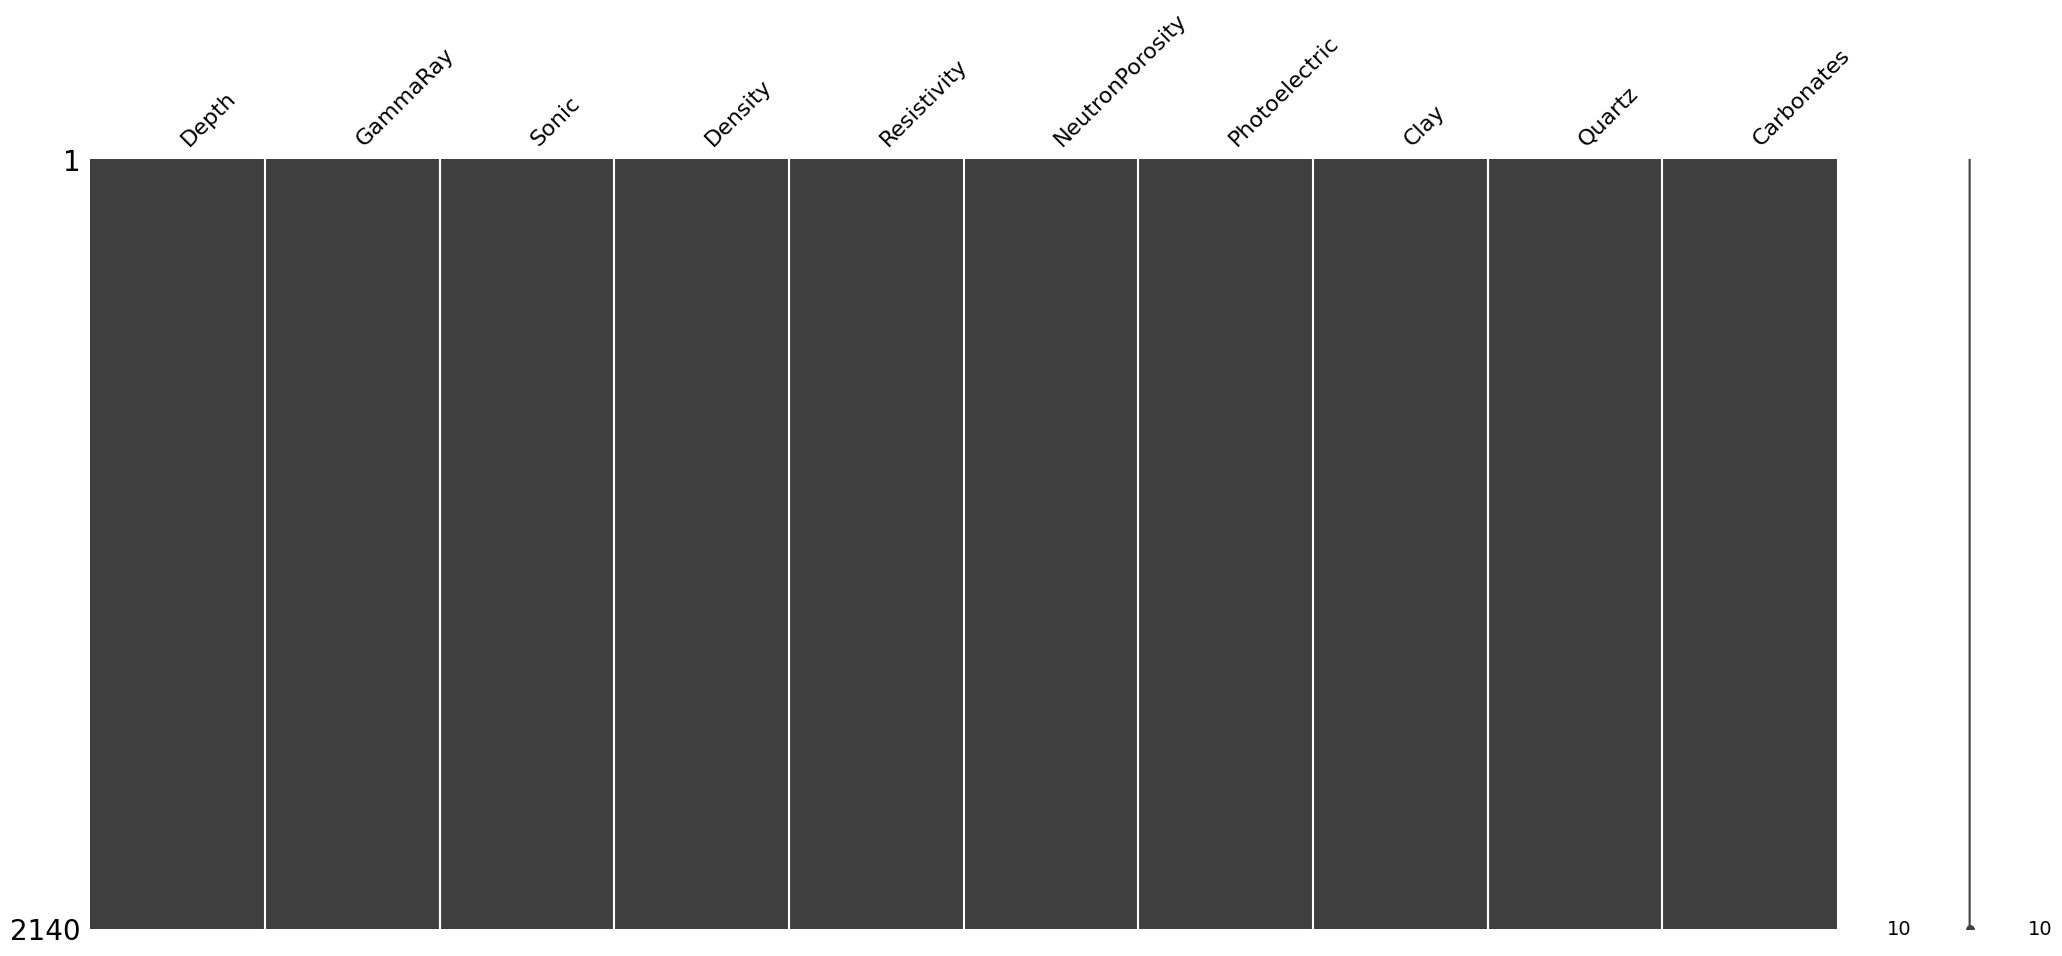

In [84]:
import missingno as msno

msno.matrix(combined_df)

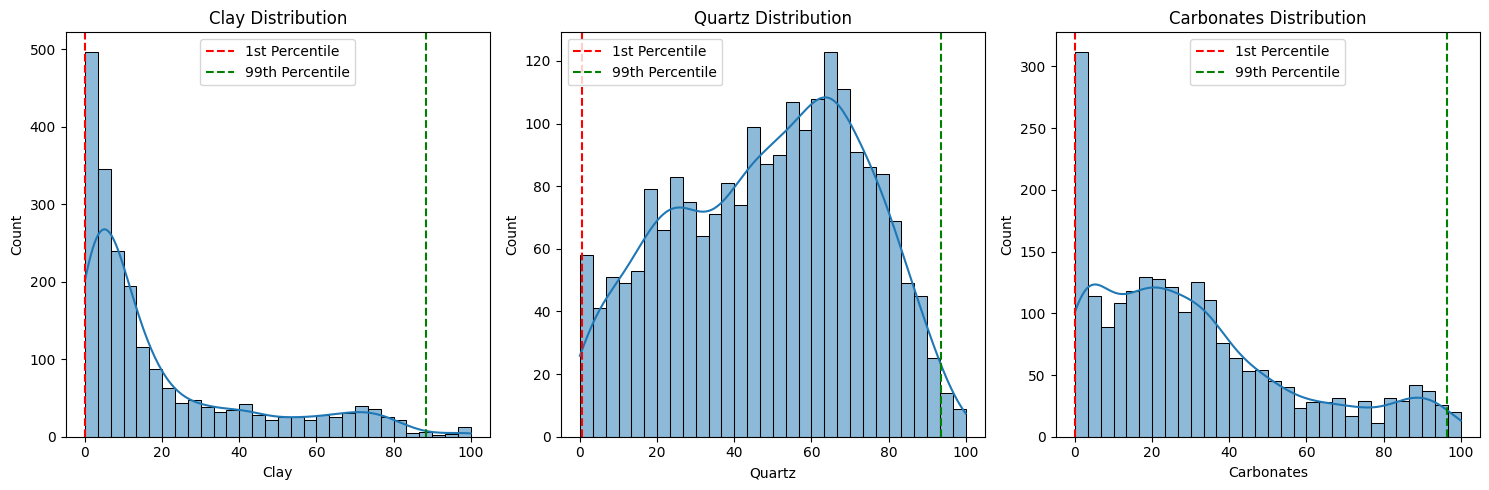

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(['Clay', 'Quartz', 'Carbonates']):
    sns.histplot(combined_df[feature], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f"{feature} Distribution")
    ax[i].axvline(combined_df[feature].quantile(0.01), color='red', linestyle='--', label='1st Percentile')
    ax[i].axvline(combined_df[feature].quantile(0.99), color='green', linestyle='--', label='99th Percentile')
    ax[i].legend()

plt.tight_layout()
plt.show()

In [86]:
for col in ['Clay', 'Quartz', 'Carbonates']:
    p1 = combined_df[col].quantile(0.01)
    p99 = combined_df[col].quantile(0.99)
    combined_df = combined_df[(combined_df[col] >= p1) & (combined_df[col] <= p99)]

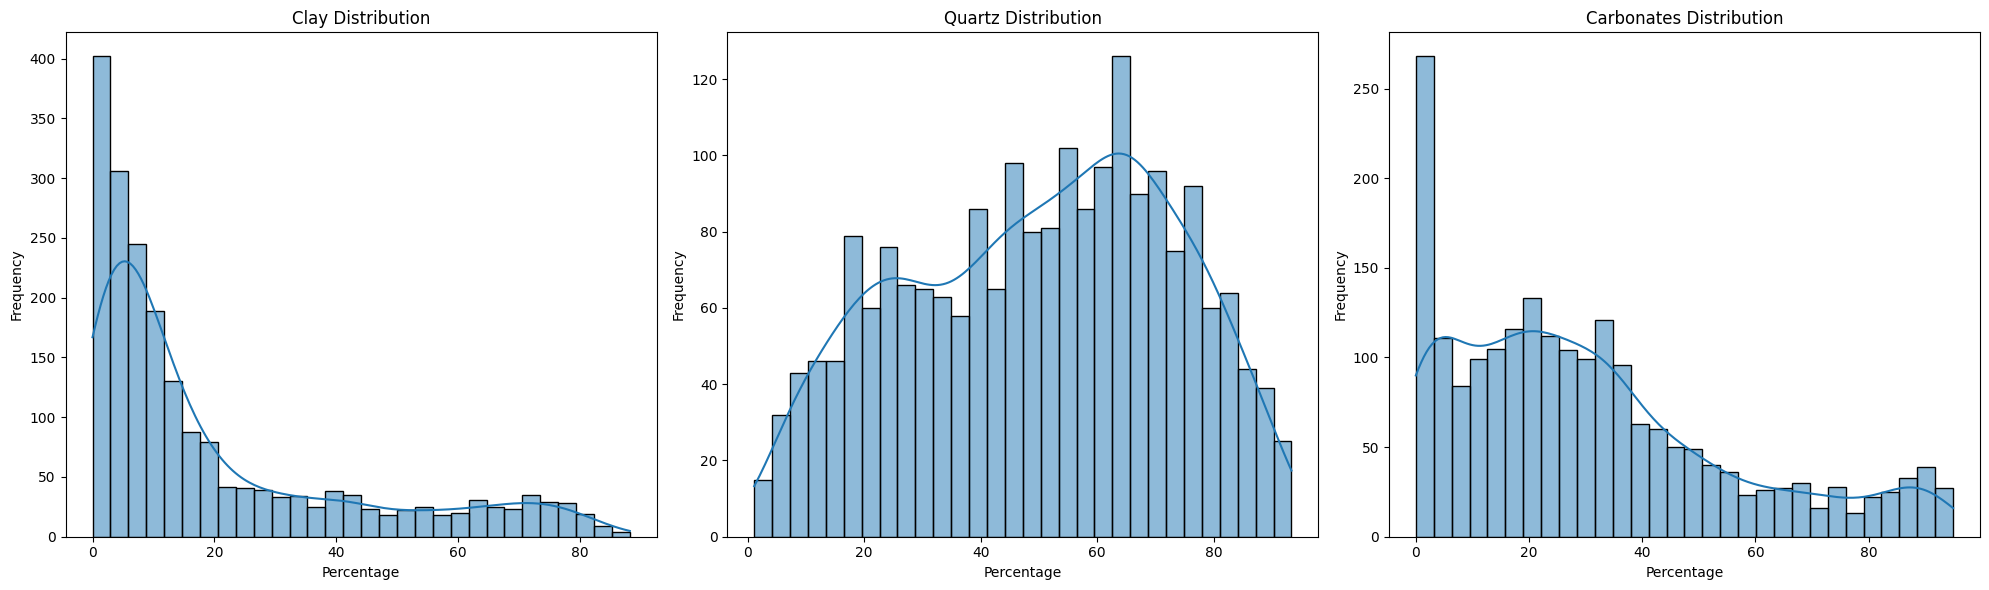

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, feature in enumerate(target):
    sns.histplot(combined_df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")
    axes[i].set_xlabel("Percentage")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

# ConvXGB (Hu et al.)

Data preparation

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd

# Define features (well logs) and target variables (minerals)
features = features
target = target

X = combined_df[features]
y = combined_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
import numpy as np
import pandas as pd

# Calculate weights based on 15-bin histogram for each target
def calculate_weights(y, bins=15):
    # Calculate the bin frequencies for each target variable
    weights = np.zeros(y.shape)
    for i, col in enumerate(y.columns):
        hist, bin_edges = np.histogram(y[col], bins=bins)
        max_freq = np.max(hist)
        bin_weights = np.zeros(len(y[col]))

        # Assign weights based on the inverse of the bin frequency
        for j in range(bins):
            bin_mask = (y[col] >= bin_edges[j]) & (y[col] < bin_edges[j+1])
            freq = hist[j]
            if freq > 0:
                bin_weights[bin_mask] = max_freq / freq

        # If the value equals the last bin edge (e.g., max value), set the weight
        bin_weights[y[col] == bin_edges[-1]] = max_freq / hist[-1]
        weights[:, i] = bin_weights

    return weights

# Calculate weights for the training set
sample_weights = calculate_weights(y_train)

# Check the shape of the weights array
print(f"Shape of sample weights: {sample_weights.shape}")

Shape of sample weights: (1438, 3)


In [91]:
from xgboost import XGBRegressor

# Define a dictionary to hold the models for each target variable
models = {}

# Train a separate XGBoost model for each target variable
for i, target_name in enumerate(target):
    print(f"Training model for {target_name}")
    # Extract sample weights for this target
    target_sample_weight = sample_weights[:, i]
    # Define the XGBoost model (you can adjust hyperparameters if needed)
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1
    )
    # Fit the model with sample weights
    xgb_model.fit(X_train, y_train[target_name], sample_weight=target_sample_weight)
    # Store the trained model
    models[target_name] = xgb_model


Training model for Clay
Training model for Quartz
Training model for Carbonates



Metrics for Clay (Validation Set):
RMSE: 262.1365
nRMSE: 3.1493
MAE: 11.9296
nMAE: 0.1433
R2: 0.4588

Metrics for Quartz (Validation Set):
RMSE: 253.7406
nRMSE: 2.7512
MAE: 11.6846
nMAE: 0.1267
R2: 0.4871

Metrics for Carbonates (Validation Set):
RMSE: 401.8761
nRMSE: 4.2332
MAE: 15.2613
nMAE: 0.1608
R2: 0.3257


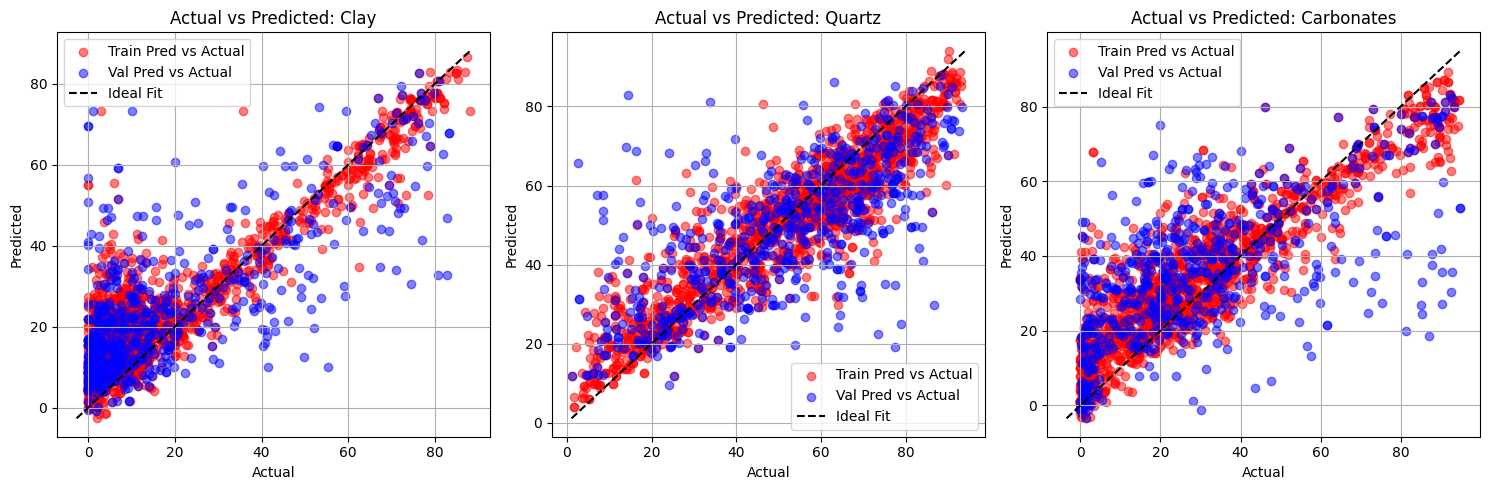

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize DataFrames to store predictions
y_train_pred = pd.DataFrame(index=y_train.index, columns=target)
y_val_pred = pd.DataFrame(index=y_val.index, columns=target)

# Predict for each target variable using the corresponding model
for mineral in target:
    # Get the model for the mineral
    model = models[mineral]
    # Predict on training data
    y_train_pred[mineral] = model.predict(X_train)
    # Predict on validation data
    y_val_pred[mineral] = model.predict(X_val)

# Define a function to calculate normalized RMSE and MAE
def calculate_normalized_error(actual, predicted):
    rmse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    norm_rmse = rmse / (actual.max() - actual.min())
    norm_mae = mae / (actual.max() - actual.min())
    return rmse, norm_rmse, mae, norm_mae

# Calculate metrics for each target variable in the validation set
metrics = {}
for mineral in target:
    val_actual = y_val[mineral]
    val_predicted = y_val_pred[mineral]
    
    rmse, norm_rmse, mae, norm_mae = calculate_normalized_error(val_actual, val_predicted)
    r2 = r2_score(val_actual, val_predicted)
    
    metrics[mineral] = {
        'RMSE': rmse,
        'nRMSE': norm_rmse,
        'MAE': mae,
        'nMAE': norm_mae,
        'R2': r2
    }

# Print the metrics for validation set
for mineral, metric in metrics.items():
    print(f'\nMetrics for {mineral} (Validation Set):')
    for k, v in metric.items():
        print(f'{k}: {v:.4f}')

# Plot actual vs predicted for each mineral
plt.figure(figsize=(15, 5))
for i, mineral in enumerate(target):
    plt.subplot(1, 3, i + 1)
    
    # Training Set: Red dots
    plt.scatter(y_train[mineral], y_train_pred[mineral], alpha=0.5, label='Train Pred vs Actual', color='red')

    # Validation Set: Blue dots
    plt.scatter(y_val[mineral], y_val_pred[mineral], alpha=0.5, label='Val Pred vs Actual', color='blue')
    
    # Ideal fit line
    all_actual = pd.concat([y_train[mineral], y_val[mineral]])
    all_predicted = pd.concat([y_train_pred[mineral], y_val_pred[mineral]])
    min_val = min(all_actual.min(), all_predicted.min())
    max_val = max(all_actual.max(), all_predicted.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal Fit')
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {mineral}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Model refinement and CNN incorporation

In [93]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the validation data
X_val_scaled = scaler.transform(X_val)

# Verify the transformation
print(f"Standardized Train Shape: {X_train_scaled.shape}")
print(f"Standardized Validation Shape: {X_val_scaled.shape}")

Standardized Train Shape: (1438, 6)
Standardized Validation Shape: (617, 6)


In [95]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Adjusted CNN model
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=2, activation='relu', padding='same'),
        # Remove the second pooling to avoid reducing the sequence to zero
        layers.Conv1D(filters=16, kernel_size=2, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='linear')  # Output for three minerals
    ])
    return model

# Define input shape based on the number of features
input_shape = (X_train_scaled.shape[1], 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.summary()

c:\Users\juanc\anaconda3\envs\ICP_ML\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 6, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 3, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 3, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,019 (46.95 KB)

 Trainable params: 12,019 (46.95 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Reshape data to fit into the CNN model (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)

# Verify reshaped data
print(f"Reshaped Train Shape for CNN: {X_train_cnn.shape}")
print(f"Reshaped Validation Shape for CNN: {X_val_cnn.shape}")

Reshaped Train Shape for CNN: (1438, 6, 1)
Reshaped Validation Shape for CNN: (617, 6, 1)


In [97]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model using Functional API
def create_cnn_model_functional(input_shape):
    inputs = Input(shape=input_shape)
    
    # Convolutional layers
    x = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(filters=32, kernel_size=2, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(filters=16, kernel_size=2, activation='relu', padding='same')(x)
    
    # Flatten layer for feature extraction
    x = Flatten(name='feature_extraction_layer')(x)
    
    # Fully connected layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(3, activation='linear')(x)  # Output for three minerals
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape based on the number of features
input_shape = (X_train_scaled.shape[1], 1)
cnn_model_functional = create_cnn_model_functional(input_shape)

# Compile the model
cnn_model_functional.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute per-sample weights by averaging weights across targets
sample_weights_per_sample = np.mean(sample_weights, axis=1)

# Train the model with sample weights
history = cnn_model_functional.fit(
    X_train_cnn,
    y_train,
    sample_weight=sample_weights_per_sample,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_cnn, y_val),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5700.4414 - val_loss: 1277.7714
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3170.5386 - val_loss: 729.9524
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2584.3765 - val_loss: 684.4366
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2335.2996 - val_loss: 633.8942
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2372.2959 - val_loss: 610.6416
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2329.4590 - val_loss: 603.3323
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2253.3274 - val_loss: 605.9656
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2251.3718 - val_loss: 589.7473
Epoch 9/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2244.9377 - val_loss: 588.2283
Epoch 10/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2118.3762 - val_loss: 594.5435
Epoch 11/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2120.1140 - val_loss: 581.6124
Epoch 1

Extract Features for XGBoost

In [98]:
# Ensure the model is called with input data first
_ = cnn_model_functional.predict(X_train_cnn[:1])

# Create the feature extractor model using the 'feature_extraction_layer'
feature_extractor = Model(
    inputs=cnn_model_functional.input,
    outputs=cnn_model_functional.get_layer(name='feature_extraction_layer').output
)

# Extract features for training and validation sets
train_features = feature_extractor.predict(X_train_cnn)
val_features = feature_extractor.predict(X_val_cnn)

# Verify the shape of the extracted features
print(f"Extracted Features Shape (Train): {train_features.shape}")
print(f"Extracted Features Shape (Validation): {val_features.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
Extracted Features Shape (Train): (1438, 16)
Extracted Features Shape (Validation): (617, 16)


Train XGBoost on CNN features

In [99]:
from xgboost import XGBRegressor

# Define a dictionary to hold the models for each target variable
models = {}

# Train a separate XGBoost model for each target variable
for i, target_name in enumerate(target):
    print(f"Training model for {target_name}")
    # Extract sample weights for this target
    target_sample_weight = sample_weights[:, i]
    # Define the XGBoost model
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1
    )
    # Fit the model with sample weights
    xgb_model.fit(train_features, y_train[target_name], sample_weight=target_sample_weight)
    # Store the trained model
    models[target_name] = xgb_model

# Initialize DataFrames to store predictions
y_train_pred = pd.DataFrame(index=y_train.index, columns=target)
y_val_pred = pd.DataFrame(index=y_val.index, columns=target)

# Predict for each target variable using the corresponding model
for target_name in target:
    # Get the model for the mineral
    model = models[target_name]
    # Predict on training data
    y_train_pred[target_name] = model.predict(train_features)
    # Predict on validation data
    y_val_pred[target_name] = model.predict(val_features)

# Verify the shape of the predictions
print(f"Train Predictions Shape: {y_train_pred.shape}")
print(f"Validation Predictions Shape: {y_val_pred.shape}")

Training model for Clay
Training model for Quartz
Training model for Carbonates
Train Predictions Shape: (1438, 3)
Validation Predictions Shape: (617, 3)



Metrics for Clay (Validation Set):
RMSE: 17.3482
nRMSE: 0.2084
MAE: 12.3469
nMAE: 0.1483
R2: 0.4841

Metrics for Quartz (Validation Set):
RMSE: 17.9770
nRMSE: 0.1949
MAE: 13.5553
nMAE: 0.1470
R2: 0.5364

Metrics for Carbonates (Validation Set):
RMSE: 22.9255
nRMSE: 0.2415
MAE: 17.0938
nMAE: 0.1801
R2: 0.3103


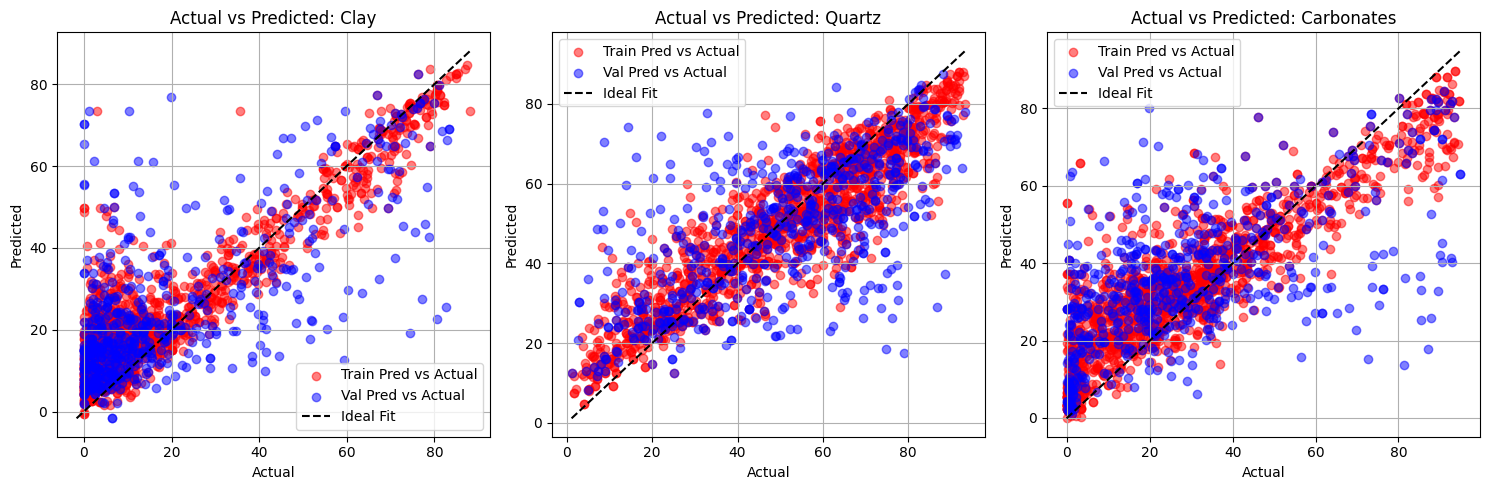

In [101]:
# Cell 7: Model Evaluation and Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Re-calculate sample weights for the validation set
sample_weights_val = calculate_weights(y_val)

# Define a function to calculate normalized RMSE and MAE with sample weights
def calculate_normalized_error(actual, predicted, sample_weight=None):
    mse = mean_squared_error(actual, predicted, sample_weight=sample_weight)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted, sample_weight=sample_weight)
    norm_rmse = rmse / (actual.max() - actual.min())
    norm_mae = mae / (actual.max() - actual.min())
    return rmse, norm_rmse, mae, norm_mae

# Calculate metrics for each target variable in the validation set
metrics = {}
for i, mineral in enumerate(target):
    val_actual = y_val[mineral]
    val_predicted = y_val_pred[mineral]
    
    # Get sample weights for the validation set and current target variable
    val_sample_weight = sample_weights_val[:, i]
    
    rmse, norm_rmse, mae, norm_mae = calculate_normalized_error(
        val_actual, val_predicted, sample_weight=val_sample_weight)
    r2 = r2_score(val_actual, val_predicted, sample_weight=val_sample_weight)
    
    metrics[mineral] = {
        'RMSE': rmse,
        'nRMSE': norm_rmse,
        'MAE': mae,
        'nMAE': norm_mae,
        'R2': r2
    }

# Print the metrics for the validation set
for mineral, metric in metrics.items():
    print(f'\nMetrics for {mineral} (Validation Set):')
    for k, v in metric.items():
        print(f'{k}: {v:.4f}')

# Plot actual vs predicted for each mineral
plt.figure(figsize=(15, 5))
for i, mineral in enumerate(target):
    plt.subplot(1, 3, i + 1)
    
    # Training Set: Red dots
    plt.scatter(y_train[mineral], y_train_pred[mineral], alpha=0.5, label='Train Pred vs Actual', color='red')

    # Validation Set: Blue dots
    plt.scatter(y_val[mineral], y_val_pred[mineral], alpha=0.5, label='Val Pred vs Actual', color='blue')
    
    # Ideal fit line
    all_actual = pd.concat([y_train[mineral], y_val[mineral]])
    all_predicted = pd.concat([y_train_pred[mineral], y_val_pred[mineral]])
    min_val = min(all_actual.min(), all_predicted.min())
    max_val = max(all_actual.max(), all_predicted.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal Fit')
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {mineral}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Model tuning

In [102]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Dictionary to hold the best models and parameters for each target variable
best_models = {}
best_params = {}

# Perform GridSearchCV for each target variable separately
for i, target_name in enumerate(target):
    print(f"Hyperparameter tuning for {target_name}")
    
    # Extract sample weights for this target
    target_sample_weight = sample_weights[:, i]
    
    # Initialize XGBRegressor
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=2,  # Use verbosity level 2 to track progress
        n_jobs=-1
    )
    
    # Fit the model with grid search and sample weights
    grid_search.fit(
        train_features, 
        y_train[target_name], 
        sample_weight=target_sample_weight
    )
    
    # Store the best model and parameters
    best_models[target_name] = grid_search.best_estimator_
    best_params[target_name] = grid_search.best_params_
    
    # Display the best parameters found by GridSearchCV
    print(f"Best Parameters for {target_name}: {grid_search.best_params_}")

Hyperparameter tuning for Clay
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for Clay: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.6}
Hyperparameter tuning for Quartz
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for Quartz: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Hyperparameter tuning for Carbonates
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for Carbonates: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [103]:
# Cell 9: Retrain XGBoost with Best Parameters
# Dictionary to hold retrained models
retrained_models = {}

# Train the XGBoost model with the best parameters for each target variable
for i, target_name in enumerate(target):
    print(f"Retraining model for {target_name} with best parameters")
    
    # Extract best parameters for this target
    params = best_params[target_name]
    
    # Extract sample weights for this target
    target_sample_weight = sample_weights[:, i]
    
    # Initialize XGBRegressor with best parameters
    best_xgb_model = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )
    
    # Retrain the model with sample weights
    best_xgb_model.fit(train_features, y_train[target_name], sample_weight=target_sample_weight)
    
    # Store the retrained model
    retrained_models[target_name] = best_xgb_model

# Initialize DataFrames to store predictions
y_train_best_pred = pd.DataFrame(index=y_train.index, columns=target)
y_val_best_pred = pd.DataFrame(index=y_val.index, columns=target)

# Predictions for both train and validation sets with the best models
for target_name in target:
    model = retrained_models[target_name]
    y_train_best_pred[target_name] = model.predict(train_features)
    y_val_best_pred[target_name] = model.predict(val_features)

# Verify the shape of the predictions
print(f"Best Model Train Predictions Shape: {y_train_best_pred.shape}")
print(f"Best Model Validation Predictions Shape: {y_val_best_pred.shape}")

Retraining model for Clay with best parameters
Retraining model for Quartz with best parameters
Retraining model for Carbonates with best parameters
Best Model Train Predictions Shape: (1438, 3)
Best Model Validation Predictions Shape: (617, 3)



Best Model Metrics for Clay (Validation Set):
RMSE: 300.6965
nRMSE: 3.6125
MAE: 12.4993
nMAE: 0.1502
R2: 0.4846

Best Model Metrics for Quartz (Validation Set):
RMSE: 359.1715
nRMSE: 3.8944
MAE: 15.5258
nMAE: 0.1683
R2: 0.4847

Best Model Metrics for Carbonates (Validation Set):
RMSE: 544.0006
nRMSE: 5.7302
MAE: 16.6887
nMAE: 0.1758
R2: 0.2862


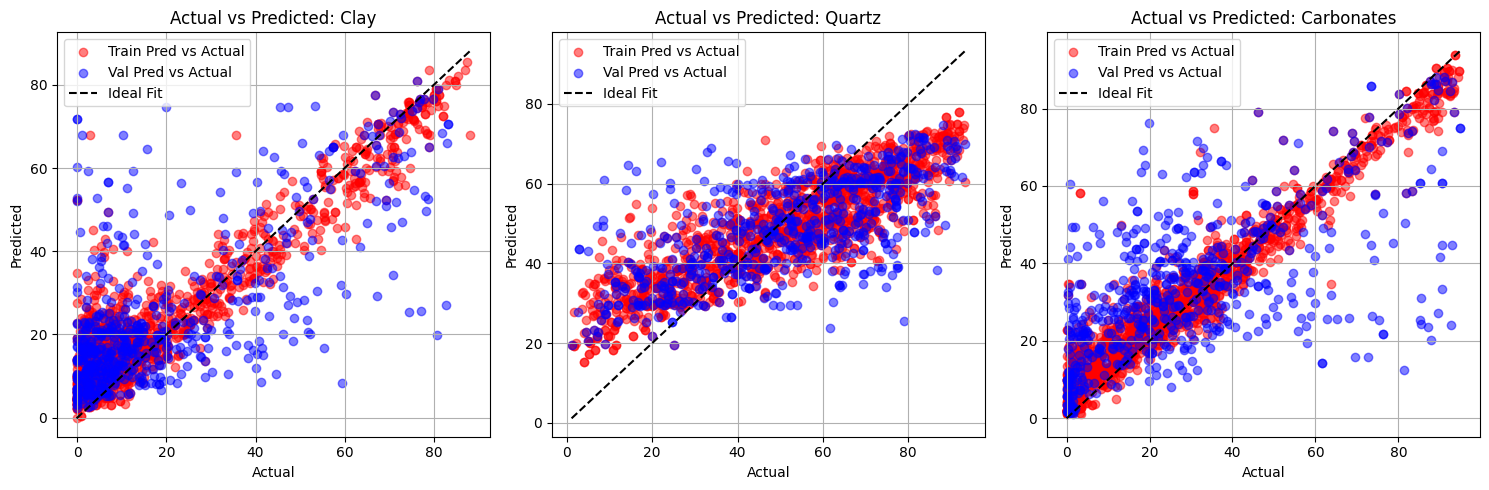

In [105]:
# Cell 10: Model Evaluation and Visualization with Best Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Re-calculate sample weights for the validation set
sample_weights_val = calculate_weights(y_val)

# Function to calculate normalized RMSE and MAE with sample weights
def calculate_normalized_error(actual, predicted, sample_weight=None):
    rmse = mean_squared_error(actual, predicted, sample_weight=sample_weight)
    mae = mean_absolute_error(actual, predicted, sample_weight=sample_weight)
    norm_rmse = rmse / (actual.max() - actual.min())
    norm_mae = mae / (actual.max() - actual.min())
    return rmse, norm_rmse, mae, norm_mae

# Calculate metrics for each target variable in the validation set with the best model
best_metrics = {}
for i, mineral in enumerate(target):
    val_actual = y_val[mineral]
    val_predicted = y_val_best_pred[mineral]
    
    # Get sample weights for the validation set and current target variable
    val_sample_weight = sample_weights_val[:, i]
    
    rmse, norm_rmse, mae, norm_mae = calculate_normalized_error(
        val_actual, val_predicted, sample_weight=val_sample_weight)
    r2 = r2_score(val_actual, val_predicted, sample_weight=val_sample_weight)
    
    best_metrics[mineral] = {
        'RMSE': rmse,
        'nRMSE': norm_rmse,
        'MAE': mae,
        'nMAE': norm_mae,
        'R2': r2
    }

# Print the metrics for validation set with the best model
for mineral, metric in best_metrics.items():
    print(f'\nBest Model Metrics for {mineral} (Validation Set):')
    for k, v in metric.items():
        print(f'{k}: {v:.4f}')

# Plot actual vs predicted for each mineral with the best model
plt.figure(figsize=(15, 5))
for i, mineral in enumerate(target):
    plt.subplot(1, 3, i + 1)
    
    # Training Set: Red dots
    plt.scatter(y_train[mineral], y_train_best_pred[mineral], alpha=0.5, label='Train Pred vs Actual', color='red')

    # Validation Set: Blue dots
    plt.scatter(y_val[mineral], y_val_best_pred[mineral], alpha=0.5, label='Val Pred vs Actual', color='blue')
    
    # Ideal fit line
    all_actual = pd.concat([y_train[mineral], y_val[mineral]])
    all_predicted = pd.concat([y_train_best_pred[mineral], y_val_best_pred[mineral]])
    min_val = min(all_actual.min(), all_predicted.min())
    max_val = max(all_actual.max(), all_predicted.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal Fit')
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {mineral}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Data Balancing and Transformation

In [106]:
# Cell 11: Apply Log Transformation to Skewed Data

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Apply log transformation to Carbonates and Clay to reduce skewness
combined_df['Log_Carbonates'] = np.log1p(combined_df['Carbonates'])
combined_df['Log_Clay'] = np.log1p(combined_df['Clay'])

# Update features and target variables
features = features
target = ['Log_Carbonates', 'Log_Clay', 'Quartz']

# Prepare transformed feature and target datasets
X_transformed = combined_df[features]
y_transformed = combined_df[target]

# Train-validation split with transformed target variables
X_train_transformed, X_val_transformed, y_train_transformed, y_val_transformed = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42)

# Recalculate sample weights based on transformed targets
def calculate_weights(y, bins=15):
    # Calculate the bin frequencies for each target variable
    weights = np.zeros(y.shape)
    for i, col in enumerate(y.columns):
        hist, bin_edges = np.histogram(y[col], bins=bins)
        max_freq = np.max(hist)
        bin_weights = np.zeros(len(y[col]))
        
        # Assign weights based on the inverse of the bin frequency
        for j in range(bins):
            bin_mask = (y[col] >= bin_edges[j]) & (y[col] < bin_edges[j+1])
            freq = hist[j]
            if freq > 0:
                bin_weights[bin_mask] = max_freq / freq

        # Handle the edge case for the last bin
        bin_mask = (y[col] == bin_edges[-1])
        freq = hist[-1]
        if freq > 0:
            bin_weights[bin_mask] = max_freq / freq

        weights[:, i] = bin_weights

    return weights

# Calculate weights for the transformed training set
sample_weights_transformed = calculate_weights(y_train_transformed)

# Scale the transformed features
scaler_transformed = StandardScaler()
X_train_transformed_scaled = scaler_transformed.fit_transform(X_train_transformed)
X_val_transformed_scaled = scaler_transformed.transform(X_val_transformed)

# Reshape the scaled data for CNN input
X_train_transformed_cnn = X_train_transformed_scaled.reshape(-1, X_train_transformed_scaled.shape[1], 1)
X_val_transformed_cnn = X_val_transformed_scaled.reshape(-1, X_val_transformed_scaled.shape[1], 1)

# Verify the shapes of transformed datasets
print(f"Transformed Train Shape: {X_train_transformed_cnn.shape}")
print(f"Transformed Validation Shape: {X_val_transformed_cnn.shape}")

Transformed Train Shape: (1644, 6, 1)
Transformed Validation Shape: (411, 6, 1)


We define hyperparameters for the CNN as well

In [107]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# Define the hypermodel
def create_cnn_hypermodel(hp):
    inputs = layers.Input(shape=input_shape)
    
    x = inputs
    # Hyperparameter for the number of Conv1D layers
    for i in range(hp.Int('conv_layers', 1, 3)):
        filters = hp.Int(f'filters_{i}', min_value=16, max_value=128, step=16)
        kernel_size = hp.Choice(f'kernel_size_{i}', values=[2, 3, 5])
        x = layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')(x)
        if hp.Boolean(f'batch_norm_{i}'):
            x = layers.BatchNormalization()(x)
        x = layers.MaxPooling1D(pool_size=2)(x)
    
    x = layers.Flatten(name='feature_extraction_layer')(x)
    
    # Hyperparameters for dense layers
    x = layers.Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu')(x)
    x = layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1))(x)
    
    outputs = layers.Dense(3, activation='linear')(x)
    
    model = models.Model(inputs, outputs)
    
    # Compile the model with a hyperparameter for optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mean_squared_error'
    )
    
    return model

In [108]:
from keras_tuner import RandomSearch

# Define input shape based on the transformed data
input_shape = (X_train_transformed_scaled.shape[1], 1)

# Initialize the tuner
tuner = RandomSearch(
    create_cnn_hypermodel,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='cnn_tuner',
    project_name='cnn_hyperparameter_tuning'
)

In [109]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute per-sample weights by averaging weights across targets
sample_weights_per_sample = np.mean(sample_weights_transformed, axis=1)

# Run the hyperparameter search
tuner.search(
    X_train_transformed_cnn,
    y_train_transformed,
    sample_weight=sample_weights_per_sample,
    epochs=50,  # Reduced epochs for tuning
    batch_size=32,
    validation_data=(X_val_transformed_cnn, y_val_transformed),
    callbacks=[early_stop],
    verbose=1
)

Trial 20 Complete [00h 00m 01s]

Best val_loss So Far: 101.95501708984375
Total elapsed time: 00h 01m 38s


In [110]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
cnn_model_transformed = tuner.hypermodel.build(best_hps)

# Print the best hyperparameters
print("Best Hyperparameters:")
for hp in best_hps.values.keys():
    print(f"{hp}: {best_hps.get(hp)}")

# Retrain the model with the best hyperparameters
history_transformed = cnn_model_transformed.fit(
    X_train_transformed_cnn,
    y_train_transformed,
    sample_weight=sample_weights_per_sample,
    epochs=150,  # Increase epochs for final training
    batch_size=32,
    validation_data=(X_val_transformed_cnn, y_val_transformed),
    callbacks=[early_stop],
    verbose=1
)

Best Hyperparameters:
conv_layers: 2
filters_0: 112
kernel_size_0: 2
batch_norm_0: False
dense_units: 192
dropout_rate: 0.1
optimizer: rmsprop
filters_1: 64
kernel_size_1: 3
batch_norm_1: False
Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1348.6562 - val_loss: 230.1480
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 472.4577 - val_loss: 170.0625
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 380.2836 - val_loss: 151.2388
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 329.2421 - val_loss: 137.5783
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 293.3320 - val_loss: 130.5338
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307.8420 - val_loss: 124.6031
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299.6734 - val_loss: 125.4956
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 271.2388 - val_loss: 125.4179
Epoch 9/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 276.9521 - val_loss: 121.0524
Epoc

In [111]:
from tensorflow.keras import models

# Ensure the model is called with input data first
_ = cnn_model_transformed.predict(X_train_transformed_cnn[:1])

# Create the feature extractor model using the 'feature_extraction_layer'
feature_extractor_transformed = models.Model(
    inputs=cnn_model_transformed.input,
    outputs=cnn_model_transformed.get_layer(name='feature_extraction_layer').output
)

# Extract features for training and validation sets
train_features_transformed = feature_extractor_transformed.predict(X_train_transformed_cnn)
val_features_transformed = feature_extractor_transformed.predict(X_val_transformed_cnn)

# Verify the shape of the extracted features
print(f"Extracted Features Shape (Train): {train_features_transformed.shape}")
print(f"Extracted Features Shape (Validation): {val_features_transformed.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
Extracted Features Shape (Train): (1644, 64)
Extracted Features Shape (Validation): (411, 64)


In [112]:
# Hyperparameter Tuning for XGBoost with TQDM Progress Tracking (Transformed Targets)
from sklearn.model_selection import GridSearchCV
import numpy as np
from xgboost import XGBRegressor

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Dictionary to hold the best parameters for each transformed target variable
best_params_transformed = {}

# Perform GridSearchCV for each transformed target variable separately
for i, target_name in enumerate(target):
    print(f"Hyperparameter tuning for {target_name}")
    
    # Extract sample weights for this target
    target_sample_weight = sample_weights_transformed[:, i]
    
    # Initialize XGBRegressor
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=0,
        n_jobs=-1
    )
    
    # Fit the model with grid search and sample weights
    grid_search.fit(
        train_features_transformed,
        y_train_transformed[target_name],
        sample_weight=target_sample_weight
    )
    
    # Store the best parameters
    best_params_transformed[target_name] = grid_search.best_params_
    
    # Display the best parameters found by GridSearchCV
    print(f"Best Parameters for {target_name}: {grid_search.best_params_}")

Hyperparameter tuning for Log_Carbonates
Best Parameters for Log_Carbonates: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Hyperparameter tuning for Log_Clay
Best Parameters for Log_Clay: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.6}
Hyperparameter tuning for Quartz
Best Parameters for Quartz: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}


In [113]:
from xgboost import XGBRegressor

# Dictionary to hold retrained models for transformed data
retrained_models_transformed = {}

# Train XGBoost model on the extracted CNN features for each target variable
for i, target_name in enumerate(target):
    print(f"Training XGBoost model for {target_name} with transformed data")
    
    # Extract sample weights for this target
    target_sample_weight = sample_weights_transformed[:, i]
    
    # Extract best parameters for this target
    params = best_params_transformed[target_name]
    
    # Set up the XGBoost model with the best parameters
    xgb_model_transformed = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )
    
    # Train the XGBoost model with the extracted features and sample weights
    xgb_model_transformed.fit(
        train_features_transformed,
        y_train_transformed[target_name],
        sample_weight=target_sample_weight
    )
    
    # Store the model
    retrained_models_transformed[target_name] = xgb_model_transformed

# Initialize DataFrames to store predictions
y_train_best_pred_transformed = pd.DataFrame(index=y_train_transformed.index, columns=target)
y_val_best_pred_transformed = pd.DataFrame(index=y_val_transformed.index, columns=target)

# Predictions for both train and validation sets
for target_name in target:
    model = retrained_models_transformed[target_name]
    y_train_best_pred_transformed[target_name] = model.predict(train_features_transformed)
    y_val_best_pred_transformed[target_name] = model.predict(val_features_transformed)

# Verify the shape of the predictions
print(f"Best Model Train Predictions Shape (Transformed): {y_train_best_pred_transformed.shape}")
print(f"Best Model Validation Predictions Shape (Transformed): {y_val_best_pred_transformed.shape}")

Training XGBoost model for Log_Carbonates with transformed data
Training XGBoost model for Log_Clay with transformed data
Training XGBoost model for Quartz with transformed data
Best Model Train Predictions Shape (Transformed): (1644, 3)
Best Model Validation Predictions Shape (Transformed): (411, 3)


In [114]:
# Cell 16: Inverse Transformation for Training and Validation Data

import numpy as np

# Apply inverse log transformation to predictions for Carbonates and Clay

# Inverse transformation for predictions
y_train_best_pred_inverse = y_train_best_pred_transformed.copy()
y_val_best_pred_inverse = y_val_best_pred_transformed.copy()

# Assuming y_train_best_pred_transformed and y_val_best_pred_transformed are DataFrames
# Apply inverse transformation using column names
y_train_best_pred_inverse['Log_Carbonates'] = np.expm1(y_train_best_pred_transformed['Log_Carbonates'])
y_train_best_pred_inverse['Log_Clay'] = np.expm1(y_train_best_pred_transformed['Log_Clay'])

y_val_best_pred_inverse['Log_Carbonates'] = np.expm1(y_val_best_pred_transformed['Log_Carbonates'])
y_val_best_pred_inverse['Log_Clay'] = np.expm1(y_val_best_pred_transformed['Log_Clay'])

# Inverse transformation for actual values
y_train_inverse = y_train_transformed.copy()
y_val_inverse = y_val_transformed.copy()

y_train_inverse['Log_Carbonates'] = np.expm1(y_train_transformed['Log_Carbonates'])
y_train_inverse['Log_Clay'] = np.expm1(y_train_transformed['Log_Clay'])

y_val_inverse['Log_Carbonates'] = np.expm1(y_val_transformed['Log_Carbonates'])
y_val_inverse['Log_Clay'] = np.expm1(y_val_transformed['Log_Clay'])

# Rename columns to original mineral names after inverse transformation
y_train_best_pred_inverse.rename(columns={'Log_Carbonates': 'Carbonates', 'Log_Clay': 'Clay'}, inplace=True)
y_val_best_pred_inverse.rename(columns={'Log_Carbonates': 'Carbonates', 'Log_Clay': 'Clay'}, inplace=True)

y_train_inverse.rename(columns={'Log_Carbonates': 'Carbonates', 'Log_Clay': 'Clay'}, inplace=True)
y_val_inverse.rename(columns={'Log_Carbonates': 'Carbonates', 'Log_Clay': 'Clay'}, inplace=True)

# Verify the shapes of inverse-transformed predictions
print(f"Inverse Transformed Train Predictions Shape: {y_train_best_pred_inverse.shape}")
print(f"Inverse Transformed Validation Predictions Shape: {y_val_best_pred_inverse.shape}")

Inverse Transformed Train Predictions Shape: (1644, 3)
Inverse Transformed Validation Predictions Shape: (411, 3)


In [116]:
# Cell 18: Re-evaluation with Inverse Transformed Data

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Recalculate sample weights for the inverse-transformed validation set
# Here, we need to create a new DataFrame with the original target names
y_val_inverse_all = y_val_inverse[['Carbonates', 'Clay', 'Quartz']]
y_val_best_pred_inverse_all = y_val_best_pred_inverse[['Carbonates', 'Clay', 'Quartz']]

# Function to calculate normalized RMSE and MAE with sample weights
def calculate_normalized_error(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    norm_rmse = rmse / (actual.max() - actual.min())
    norm_mae = mae / (actual.max() - actual.min())
    return rmse, norm_rmse, mae, norm_mae

# Calculate metrics for each target variable in the validation set with the inverse-transformed values
inverse_metrics = {}
for i, mineral in enumerate(['Carbonates', 'Clay', 'Quartz']):
    val_actual = y_val_inverse[mineral]
    val_predicted = y_val_best_pred_inverse[mineral]
      
    rmse, norm_rmse, mae, norm_mae = calculate_normalized_error(
        val_actual, val_predicted)
    r2 = r2_score(val_actual, val_predicted)
    
    inverse_metrics[mineral] = {
        'RMSE': rmse,
        'nRMSE': norm_rmse,
        'MAE': mae,
        'nMAE': norm_mae,
        'R2': r2
    }

# Print the metrics for validation set with inverse-transformed predictions
for mineral, metric in inverse_metrics.items():
    print(f'\nInverse Transformed Model Metrics for {mineral} (Validation Set):')
    for k, v in metric.items():
        print(f'{k}: {v:.4f}')


Inverse Transformed Model Metrics for Carbonates (Validation Set):
RMSE: 19.1325
nRMSE: 0.2015
MAE: 12.1130
nMAE: 0.1276
R2: 0.4197

Inverse Transformed Model Metrics for Clay (Validation Set):
RMSE: 15.5959
nRMSE: 0.1874
MAE: 10.0344
nMAE: 0.1206
R2: 0.4999

Inverse Transformed Model Metrics for Quartz (Validation Set):
RMSE: 15.6297
nRMSE: 0.1738
MAE: 11.2882
nMAE: 0.1255
R2: 0.5047


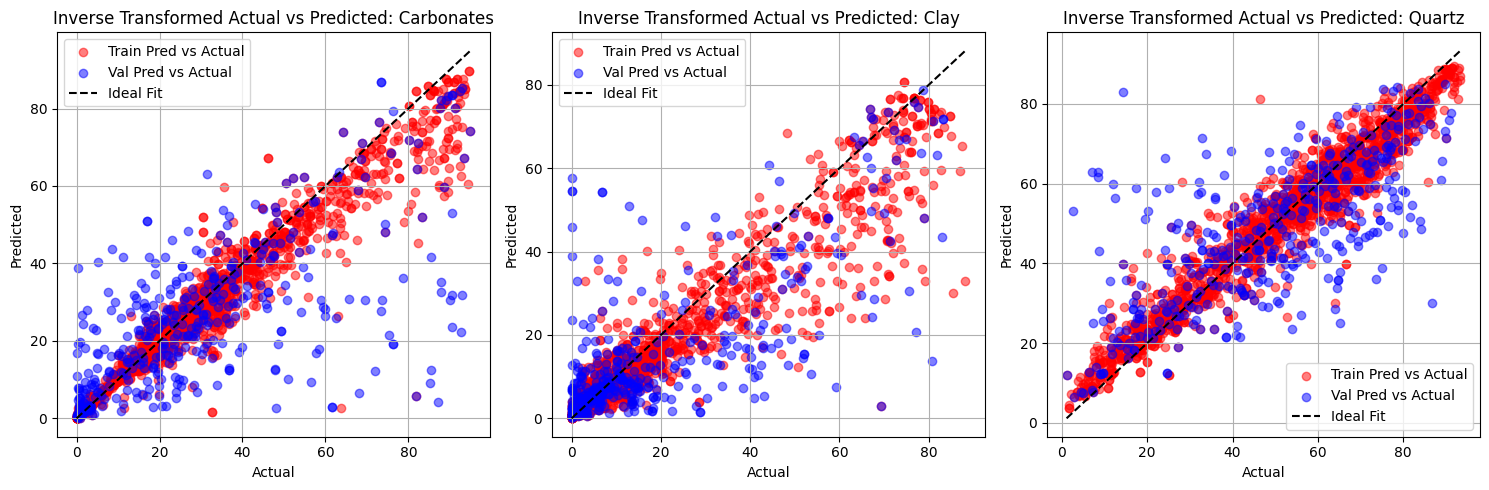

In [117]:
# Cell 17: Plot Inverse Transformed Actual vs. Predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, mineral in enumerate(['Carbonates', 'Clay', 'Quartz']):
    plt.subplot(1, 3, i + 1)
    
    # Training Set: Red dots
    plt.scatter(
        y_train_inverse[mineral],
        y_train_best_pred_inverse[mineral],
        alpha=0.5,
        label='Train Pred vs Actual',
        color='red'
    )

    # Validation Set: Blue dots
    plt.scatter(
        y_val_inverse[mineral],
        y_val_best_pred_inverse[mineral],
        alpha=0.5,
        label='Val Pred vs Actual',
        color='blue'
    )
    
    # Ideal fit line
    all_actual = pd.concat([y_train_inverse[mineral], y_val_inverse[mineral]])
    min_val = all_actual.min()
    max_val = all_actual.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal Fit')
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Inverse Transformed Actual vs Predicted: {mineral}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [118]:
# Cell 19: Inverse Transformation for Training Data

# Recalculate sample weights for the inverse-transformed training set
y_train_inverse_all = y_train_inverse[['Carbonates', 'Clay', 'Quartz']]
y_train_best_pred_inverse_all = y_train_best_pred_inverse[['Carbonates', 'Clay', 'Quartz']]

sample_weights_train_inverse = calculate_weights(y_train_inverse_all)

# Calculate metrics for each target variable in the training set with the inverse-transformed values
inverse_metrics_train = {}
for i, mineral in enumerate(['Carbonates', 'Clay', 'Quartz']):
    train_actual = y_train_inverse[mineral]
    train_predicted = y_train_best_pred_inverse[mineral]
    
    # Get sample weights for the training set and current target variable
    train_sample_weight = sample_weights_train_inverse[:, i]
    
    rmse, norm_rmse, mae, norm_mae = calculate_normalized_error(
        train_actual, train_predicted)
    r2 = r2_score(train_actual, train_predicted)
    
    inverse_metrics_train[mineral] = {
        'RMSE': rmse,
        'nRMSE': norm_rmse,
        'MAE': mae,
        'nMAE': norm_mae,
        'R2': r2
    }

# Print the metrics for training set with inverse-transformed predictions
for mineral, metric in inverse_metrics_train.items():
    print(f'\nInverse Transformed Model Metrics for {mineral} (Training Set):')
    for k, v in metric.items():
        print(f'{k}: {v:.4f}')


Inverse Transformed Model Metrics for Carbonates (Training Set):
RMSE: 6.7428
nRMSE: 0.0710
MAE: 3.7839
nMAE: 0.0399
R2: 0.9246

Inverse Transformed Model Metrics for Clay (Training Set):
RMSE: 8.4770
nRMSE: 0.0961
MAE: 4.7772
nMAE: 0.0542
R2: 0.8599

Inverse Transformed Model Metrics for Quartz (Training Set):
RMSE: 6.2030
nRMSE: 0.0673
MAE: 4.6298
nMAE: 0.0502
R2: 0.9272
